# Analiza koncentracije polena u vazduhu u Srbiji

U ovom projektu analiziram koncentracije polena u dobijene na 27 mernih mesta u Srbiji u periodu od 2016 do 2019 godine. Podaci su preuzeti sa sajta https://data.gov.rs i obezbedila ih je Agencija za zaštitu životne sredine.

Kada se govori o "koncentraciji polena", misli se na broj polenskih zrna detektovanih po kubnom metru vazduha. 

Cilj je dobiti odgovore na pitanja poput:

- U kojim delovima godine su koncentracije alergena najviše, a u kojima najniže?
- U kojim delovima godine su najviše koncentracije visoko alergenih polena?
- Da li se izmerene koncentracije polena poklapaju sa zvaničnim kalendarima cvetanja?
- U kojim gradovima su najviše i najniže koncentracije polena?

In [1]:
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
allergen_types = requests.get('http://polen.sepa.gov.rs/api/opendata/allergen-types/')
allergens = requests.get('http://polen.sepa.gov.rs/api/opendata/allergens/')
locations = requests.get('http://polen.sepa.gov.rs/api/opendata/locations/')
pollens = requests.get('http://polen.sepa.gov.rs/api/opendata/pollens/')
con = requests.get('http://polen.sepa.gov.rs/api/opendata/concentrations')

In [3]:
allergen_types_json = allergen_types.json()

In [4]:
allergens_json = allergens.json()

In [5]:
locations_json = locations.json()

In [6]:
pollens_json = pollens.json()

Zbog velikog broja stranica, podaci iz tabela pollens i concentrations su preuzeti sa API servera i sačuvani kao csv fajl:

In [7]:
#pollens_json_all = list()
#pollens_json_all = pollens_json_all + pollens_json['results']

In [8]:
#while pollens_json['next'] is not None:
   # print ('Another page found', pollens_json['next'])
    #response = requests.get(pollens_json['next'])
   # pollens_json = response.json()
    #pollens_json_all = pollens_json_all + pollens_json['results']

In [9]:
#pollens_df = pd.DataFrame.from_dict(json_normalize(pollens_json_all), orient='columns')

In [10]:
#export_pollens = pollens_df.to_csv('pollens.csv')

In [11]:
pollens_df = pd.read_csv('pollens.csv',index_col=0)

In [12]:
pollens_df.head(20)

,concentrations,date,id,location
0,"[3002, 3003, 3004, 3005]",2016-02-01,539,12
1,"[4649, 4650, 4651]",2016-02-01,805,3
2,"[6126, 6127, 6128]",2016-02-01,1078,4
3,[],2016-02-01,1351,20
4,[],2016-02-01,1624,5
5,"[10767, 10768]",2016-02-01,1897,10
6,"[12370, 12371, 12372]",2016-02-01,2170,14
7,"[15518, 15519]",2016-02-01,2686,13
8,"[17422, 17423, 17424, 17425]",2016-02-01,2965,17
9,"[19339, 19340]",2016-02-01,3238,9


In [13]:
#con_json = con.json()

In [14]:
#con_json_all = list()
#con_json_all = con_json_all + con_json['results']

In [15]:
#while con_json['next'] is not None:
  #  print ('Another page found', con_json['next'])
   # response = requests.get(con_json['next'])
   # con_json = response.json()
    #con_json_all = con_json_all + con_json['results']

In [16]:
#con_df = pd.DataFrame.from_dict(json_normalize(con_json_all), orient='columns')

In [17]:
con_df = pd.read_csv('conc.csv',index_col=0)

In [18]:
con_df.head()

,allergen,id,pollen,value
0,1,12688,2231,19
1,1,16255,2771,1
2,1,11233,1966,126
3,1,12679,2230,24
4,1,15767,2729,1


In [19]:
#export_con = con_df.to_csv('conc.csv')

In [20]:
allergen_types_df = pd.DataFrame.from_dict(json_normalize(allergen_types_json), orient='columns')

In [21]:
allergen_types_df

,id,name
0,1,Дрвеће
1,3,Корови
2,2,Траве


In [22]:
allergens_df = pd.DataFrame.from_dict(json_normalize(allergens_json), orient='columns')

In [23]:
allergens_df

,allergenicity,allergenicity_display,id,localized_name,margine_bottom,margine_top,name,type
0,1,mild,1,ЈАВОР,60,100,ACER,1
1,3,high,2,ЈОВА,60,100,ALNUS,1
2,3,high,3,АМБРОЗИЈА,30,100,AMBROSIA,3
3,2,moderate,4,ПЕЛИН,60,100,ARTEMISIA,3
4,3,high,5,БРЕЗА,60,100,BETULA,1
5,1,mild,6,КОНОПЉЕ,60,100,CANNABACEAE,3
6,1,mild,7,ГРАБ,60,100,CARPINUS,1
7,1,mild,26,КОПРИВИЋ,60,100,CELTIS,1
8,2,moderate,8,ШТИРЕВИ/ПЕПЕЉУГЕ,60,100,CHENOP/AMAR.,3
9,2,moderate,9,ЛЕСКА,60,100,CORYLUS,1


In [24]:
locations_df = pd.DataFrame.from_dict(json_normalize(locations_json), orient='columns')

In [25]:
locations_df

,description,id,latitude,longitude,name
0,,2,44.800000,20.466670,БЕОГРАД (ЗВЕЗДАРА) - ЗЕЛЕНО БРДО
1,,1,44.818610,20.468060,БЕОГРАД - НОВИ БЕОГРАД
2,,17,45.625130,20.052790,БЕЧЕЈ
3,,27,0.000000,0.000000,ВАЉЕВО
4,,8,42.551390,21.900280,ВРАЊЕ
5,,25,0.000000,0.000000,ВРБАС
6,Подаци о установи у којој се обављају мерења а...,9,45.116670,21.303610,ВРШАЦ
7,,10,43.904170,22.284720,ЗАЈЕЧАР
8,,16,43.721720,19.700970,ЗЛАТИБОР
9,,26,0.000000,0.000000,ЗРЕЊАНИН


Podaci su preuzeti kao JSON fajl, a zatim konvertovani u pandas dataframe, radi lakše manipulacije i vizuelizacije. Dobijene su četiri tabele, koje je potrebno očistiti i zatim spojiti.

## Čišćenje podataka

In [26]:
cirilica = ['А', 'Б', 'В', 'Г', 'Д', 'Ђ', 'Е', 'Ж', 'З', 'И', 'Ј', 'К', 'Л','Љ', "М", "Н", "Њ", 'О', 'П', 'Р', 'С', 'Т', 'Ћ', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Џ', 'Ш']
latinica = ['a', 'b', 'v', 'g', 'd', 'đ', 'e', 'ž', 'z', 'i', 'j', 'k', 'l', 'lj', 'm', 'n', 'nj', 'o', 'p', 'r', 's', 't', 'ć', 'u', 'f', 'h', 'c', 'č', 'dž', 'š']
recnik_slova = {}
for i, cir in enumerate(cirilica):
    lat = latinica[i]
    recnik_slova[cir] = lat

In [27]:
def cir_to_lat(string):
    list1=[]
    for s in string.upper():
        if s in recnik_slova:
            list1.append(recnik_slova[s])
        else: list1.append(s.lower())
    return ''.join(list1)

In [28]:
allergen_types_df['name'] = allergen_types_df['name'].apply(cir_to_lat)

In [29]:
allergen_types_df

,id,name
0,1,drveće
1,3,korovi
2,2,trave


In [30]:
allergens_df['localized_name'] = allergens_df['localized_name'].apply(cir_to_lat)

In [31]:
allergens_df

,allergenicity,allergenicity_display,id,localized_name,margine_bottom,margine_top,name,type
0,1,mild,1,javor,60,100,ACER,1
1,3,high,2,jova,60,100,ALNUS,1
2,3,high,3,ambrozija,30,100,AMBROSIA,3
3,2,moderate,4,pelin,60,100,ARTEMISIA,3
4,3,high,5,breza,60,100,BETULA,1
5,1,mild,6,konoplje,60,100,CANNABACEAE,3
6,1,mild,7,grab,60,100,CARPINUS,1
7,1,mild,26,koprivić,60,100,CELTIS,1
8,2,moderate,8,štirevi/pepeljuge,60,100,CHENOP/AMAR.,3
9,2,moderate,9,leska,60,100,CORYLUS,1


In [32]:
allergens_df['name'] = allergens_df['name'].apply(lambda s: s.lower())

In [33]:
locations_df = locations_df.drop(columns=['description'])

In [34]:
locations_df['name'] = locations_df['name'].apply(cir_to_lat)

In [35]:
locations_df['latitude'] = locations_df['latitude'].astype(float)
locations_df['longitude'] = locations_df['longitude'].astype(float)

In [36]:
pd.options.mode.chained_assignment = None

Neka merna mesta nisu imala podatke o geografskoj širini i dužini:

In [37]:
locations_df['latitude'][3] = 44.27596
locations_df['longitude'][3] = 19.91217
locations_df['latitude'][5] = 45.57329
locations_df['longitude'][5] = 19.65409
locations_df['latitude'][9] = 45.39890
locations_df['longitude'][9] = 20.37644
locations_df['latitude'][10] = 45.84249
locations_df['longitude'][10] = 20.46425
locations_df['latitude'][18] = 45.32188
locations_df['longitude'][18] = 19.82978
locations_df['latitude'][23] = 45.76725
locations_df['longitude'][23] = 19.14311
locations_df['latitude'][24] = 45.00965
locations_df['longitude'][24] = 19.55489

In [38]:
locations_df

,id,latitude,longitude,name
0,2,44.80000,20.46667,beograd (zvezdara) - zeleno brdo
1,1,44.81861,20.46806,beograd - novi beograd
2,17,45.62513,20.05279,bečej
3,27,44.27596,19.91217,valjevo
4,8,42.55139,21.90028,vranje
5,25,45.57329,19.65409,vrbas
6,9,45.11667,21.30361,vršac
7,10,43.90417,22.28472,zaječar
8,16,43.72172,19.70097,zlatibor
9,26,45.39890,20.37644,zrenjanin


In [39]:
con_df.head()

,allergen,id,pollen,value
0,1,12688,2231,19
1,1,16255,2771,1
2,1,11233,1966,126
3,1,12679,2230,24
4,1,15767,2729,1


In [40]:
def print_tables(l):
    for df in l:
        print(df.head(), '\n')

In [41]:
list = [allergen_types_df,
       allergens_df,
       locations_df,
       pollens_df,
       con_df]

In [42]:
print_tables(list)

   id    name
0   1  drveće
1   3  korovi
2   2   trave 

   allergenicity allergenicity_display  id localized_name  margine_bottom  \
0              1                  mild   1          javor              60   
1              3                  high   2           jova              60   
2              3                  high   3      ambrozija              30   
3              2              moderate   4          pelin              60   
4              3                  high   5          breza              60   

   margine_top       name  type  
0          100       acer     1  
1          100      alnus     1  
2          100   ambrosia     3  
3          100  artemisia     3  
4          100     betula     1   

   id  latitude  longitude                              name
0   2  44.80000   20.46667  beograd (zvezdara) - zeleno brdo
1   1  44.81861   20.46806            beograd - novi beograd
2  17  45.62513   20.05279                             bečej
3  27  44.27596   19.91217   

In [43]:
con_df = con_df.drop_duplicates()

In [44]:
pollens_df = pollens_df.drop_duplicates()

In [45]:
pollens_df = pollens_df.drop(pollens_df[pollens_df['concentrations']=='[]'].index)

In [46]:
def to_time(s):
    s = dt.strptime(s, '%Y-%m-%d')
    return s

In [47]:
pollens_df['date'] = pollens_df['date'].apply(to_time)

In [48]:
def ukloni_zagrade(s):
    s = s.replace('[', '').replace(']', '')
    return s

In [49]:
pollens_df['concentrations'] = pollens_df['concentrations'].apply(ukloni_zagrade)

In [50]:
lst_col = 'concentrations' 

x = pollens_df.assign(**{lst_col:pollens_df[lst_col].str.split(',')})

In [51]:
pollens_df = pd.DataFrame({
          col:np.repeat(x[col].values, x[lst_col].str.len())
          for col in x.columns.difference([lst_col])
      }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]

In [52]:
pollens_df['concentrations'] = pollens_df['concentrations'].astype(int)

## Spajanje tabela

In [53]:
pc_merged = pd.merge(left = pollens_df, right = con_df, left_on ='concentrations', right_on = 'id')

In [54]:
pc_merged.head()

,concentrations,date,id_x,location,allergen,id_y,pollen,value
0,3002,2016-02-01,539,12,9,3002,539,5
1,3003,2016-02-01,539,12,10,3003,539,2
2,3004,2016-02-01,539,12,12,3004,539,1
3,3005,2016-02-01,539,12,15,3005,539,1
4,4649,2016-02-01,805,3,2,4649,805,1


In [55]:
pc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262396 entries, 0 to 262395
Data columns (total 8 columns):
concentrations    262396 non-null int32
date              262396 non-null datetime64[ns]
id_x              262396 non-null int64
location          262396 non-null int64
allergen          262396 non-null int64
id_y              262396 non-null int64
pollen            262396 non-null int64
value             262396 non-null int64
dtypes: datetime64[ns](1), int32(1), int64(6)
memory usage: 17.0 MB


In [56]:
pc_merged.describe()

,concentrations,id_x,location,allergen,id_y,pollen,value
count,262396.000000,262396.000000,262396.000000,262396.000000,262396.000000,262396.000000,262396.000000
mean,198173.663974,13295.773324,12.854403,13.301586,198173.663974,13295.773324,8.802124
std,119727.572898,5925.241656,7.506342,7.153637,119727.572898,5925.241656,56.707532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,92379.750000,8686.000000,6.000000,7.000000,92379.750000,8686.000000,0.000000
50%,194855.500000,13045.000000,12.000000,13.000000,194855.500000,13045.000000,0.000000
75%,302503.500000,18141.000000,20.000000,19.000000,302503.500000,18141.000000,2.000000
max,408805.000000,26302.000000,27.000000,26.000000,408805.000000,26302.000000,10034.000000


Nakon spajanja, izgubljeno je oko 36% redova, jer za njih ne postoje izmerene koncentracije. Najviše izgubljenih podataka je za Valjevo.

In [57]:
pc_merged = pd.merge(left = pc_merged, right = locations_df, left_on ='location', right_on = 'id')

In [58]:
pc_merged = pd.merge(left = pc_merged, right = allergens_df, left_on ='allergen', right_on = 'id')

In [59]:
pc_merged = pd.merge(left = pc_merged, right = allergen_types_df, left_on ='type', right_on = 'id')

In [60]:
pc_merged.head()

,concentrations,date,id_x,location,allergen,id_y,pollen,value,id_x,latitude,...,allergenicity,allergenicity_display,id_y,localized_name,margine_bottom,margine_top,name_y,type,id,name
0,3002,2016-02-01,539,12,9,3002,539,5,12,43.72583,...,2,moderate,9,leska,60,100,corylus,1,1,drveće
1,3006,2016-02-02,540,12,9,3006,540,5,12,43.72583,...,2,moderate,9,leska,60,100,corylus,1,1,drveće
2,3010,2016-02-03,541,12,9,3010,541,9,12,43.72583,...,2,moderate,9,leska,60,100,corylus,1,1,drveće
3,3013,2016-02-04,542,12,9,3013,542,1,12,43.72583,...,2,moderate,9,leska,60,100,corylus,1,1,drveće
4,3014,2016-02-05,543,12,9,3014,543,1,12,43.72583,...,2,moderate,9,leska,60,100,corylus,1,1,drveće


In [61]:
pc_merged.columns

Index(['concentrations', 'date', 'id_x', 'location', 'allergen', 'id_y',
       'pollen', 'value', 'id_x', 'latitude', 'longitude', 'name_x',
       'allergenicity', 'allergenicity_display', 'id_y', 'localized_name',
       'margine_bottom', 'margine_top', 'name_y', 'type', 'id', 'name'],
      dtype='object')

In [62]:
pc_final = pc_merged[['date','location','name_x','allergen', 'value','latitude', 'longitude','allergenicity','allergenicity_display','localized_name',
       'type', 'id', 'name']]

In [63]:
pc_final = pc_final.rename(columns={'name_x':'mesto'})

In [64]:
pc_final.head()

,date,location,mesto,allergen,value,latitude,longitude,allergenicity,allergenicity_display,localized_name,type,id,name
0,2016-02-01,12,kraljevo,9,5,43.72583,20.68944,2,moderate,leska,1,1,drveće
1,2016-02-02,12,kraljevo,9,5,43.72583,20.68944,2,moderate,leska,1,1,drveće
2,2016-02-03,12,kraljevo,9,9,43.72583,20.68944,2,moderate,leska,1,1,drveće
3,2016-02-04,12,kraljevo,9,1,43.72583,20.68944,2,moderate,leska,1,1,drveće
4,2016-02-05,12,kraljevo,9,1,43.72583,20.68944,2,moderate,leska,1,1,drveće


# Kategorizacija izmerenih koncentracija

Za kategorizaciju koristićemo vrednosti polena u vazduhu koje se mogu naći na sajtu Američke akademije za alergije, astmu i imunologiju - https://www.aaaai.org/global/nab-pollen-counts/reading-the-charts . Kategorizacija zavisi od tipa alegena i deli koncentraciju polena u pet kategorija: absent, low, moderate, high i very high.

In [65]:
def categorise(row):
    if row['type'] == 1:
        if row['value'] == 0:
            level = 'absent'
        elif 0 < row['value'] <= 14:
                level = 'low'
        elif 14 < row['value'] <= 89:
                level = 'moderate'
        elif 89 < row['value'] <= 1499:
                level = 'high'
        elif row['value'] > 1499:
                level = 'very high'
    elif row['type'] == 2:
        if row['value'] == 0:
            level = 'absent'
        elif 0 < row['value'] <= 4:
                level = 'low'
        elif 4 < row['value'] <= 19:
                level = 'moderate'
        elif 19 < row['value'] <= 199:
                level = 'high'
        elif row['value'] > 199:
                level = 'very high'
    elif row['type'] == 3:
        if row['value'] == 0:
            level = 'absent'
        elif 0 < row['value'] <= 9:
                level = 'low'
        elif 9 < row['value'] <= 49:
                level = 'moderate'
        elif 49 < row['value'] <= 499:
                level = 'high'
        elif row['value'] > 499:
                level = 'very high'
    return level

In [66]:
pc_final['level'] = pc_final.apply(categorise, axis = 1)

In [67]:
pc_final['level'].value_counts()

absent       169382
low           61674
moderate      21497
high           9661
very high       182
Name: level, dtype: int64

Konačna tabela:

In [68]:
pc_final.head()

,date,location,mesto,allergen,value,latitude,longitude,allergenicity,allergenicity_display,localized_name,type,id,name,level
0,2016-02-01,12,kraljevo,9,5,43.72583,20.68944,2,moderate,leska,1,1,drveće,low
1,2016-02-02,12,kraljevo,9,5,43.72583,20.68944,2,moderate,leska,1,1,drveće,low
2,2016-02-03,12,kraljevo,9,9,43.72583,20.68944,2,moderate,leska,1,1,drveće,low
3,2016-02-04,12,kraljevo,9,1,43.72583,20.68944,2,moderate,leska,1,1,drveće,low
4,2016-02-05,12,kraljevo,9,1,43.72583,20.68944,2,moderate,leska,1,1,drveće,low


## Analiza podataka

In [69]:
pollen_mean = pc_final.groupby('date')['value'].mean()

In [70]:
%matplotlib inline

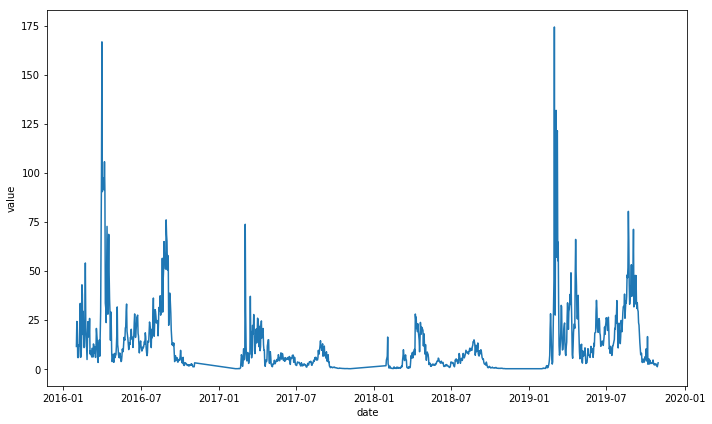

In [71]:
plt.figure(figsize=(10,6))
sns.lineplot(x=pollen_mean.index,y=pollen_mean)
plt.tight_layout()

In [72]:
pc_zeroes = pc_final[pc_final['value'] == 0]
pc_zeroes_grouped = pc_zeroes.groupby('date')['date'].count()

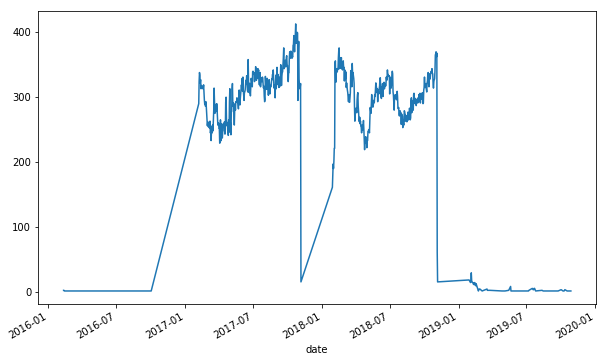

In [73]:
plt.figure(figsize=(10,6))
pc_zeroes_grouped.plot()

Nakon grafičkog prikaza koncentracija polena, primećen je veliki broj podataka za vrednostima 0 u 2017 i 2018 godini:

In [74]:
len(pc_zeroes)

169382

In [75]:
pc_zeroes['mesto'].value_counts()

novi pazar                          7977
beograd (zvezdara) - zeleno brdo    7701
zlatibor                            7672
kruševac                            7609
loznica                             7432
beograd - novi beograd              7430
obrenovac                           7423
zaječar                             7396
kragujevac                          7133
čačak                               7124
kula                                7094
niš                                 7080
pančevo                             6855
kraljevo                            6801
subotica                            6660
bečej                               6604
požarevac                           6453
vršac                               6418
sokobanja                           6177
sremska mitrovica                   6115
vranje                              5984
kikinda                             5568
vrbas                               5557
sombor                              5545
zrenjanin       

In [76]:
pc_zeroes['localized_name'].value_counts()

grab                 8049
bukva                8000
leska                7966
topola               7803
lipa                 7802
brest                7761
platan               7725
vrba                 7705
kiselice             7704
dud                  7664
jasen                7556
orah                 7519
hrast                7503
breza                6985
konoplje             6813
jova                 6756
pelin                6465
bokvica              6378
četinari             6278
tisa/čempr.          5942
ambrozija            5566
štirevi/pepeljuge    5497
javor                4624
kopriva              3824
trave                3496
koprivić                1
Name: localized_name, dtype: int64

Vidimo da su podaci koji nedostaju po mestima i vrstama biljaka donekle uniformno rasprostranjeni.

169382 reda ima vrednost koncentracije polena 0. Većina je u godinama 2017 i 2018.

In [77]:
years = [2016, 2017, 2018, 2019]
for y in years:
    zero_count = pc_final[(pc_final['date'].dt.year == y)&(pc_final['value']==0)].shape[0]
    length = pc_final[pc_final['date'].dt.year == y].shape[0]
    zero_perc = (zero_count/length)*100
    print(y, ':', zero_count, '-', zero_perc,'%')

2016 : 15 - 0.06322178201129564 %
2017 : 84865 - 77.7351335507273 %
2018 : 84107 - 80.25247368873029 %
2019 : 395 - 1.599514071674428 %


Oko 80% izmerenih koncentracija polena u godinama 2017 i 2018 ima vrednosti 0, dok je za 2016. godinu taj broj praktično 0%. Nakon ponovne provere, zaključak da su podaci na API serveru zaista ovakvi. Očigledno je reč o grešci. Odluka je da se podaci sa vrednostima 0 za ove dve godine uklone.

In [78]:
zeroes1718 = pc_final[((pc_final['date'].dt.year == 2017)|(pc_final['date'].dt.year == 2018))&(pc_final['value']==0)]

In [79]:
pc_final = pc_final.drop(zeroes1718.index)

In [80]:
pollen2016 = pc_final[pc_final['date'].dt.year == 2016]
means_2016 = pollen2016.groupby('date')['value'].mean()

In [81]:
pollen2019 = pc_final[pc_final['date'].dt.year == 2019]
means_2019 = pollen2019.groupby('date')['value'].mean()

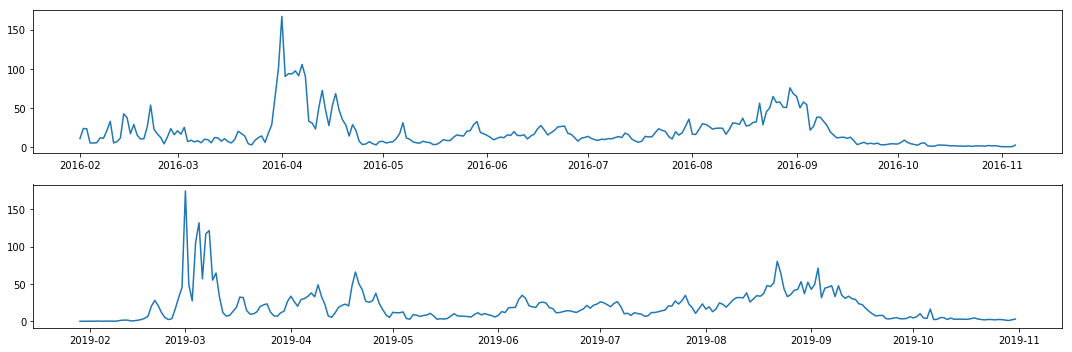

In [82]:
fig, axs = plt.subplots(2, figsize=(15,5))

axs[0].plot(means_2016)
axs[1].plot(means_2019)

fig.tight_layout()

Posmatrajući grafike, možemo zaključiti da u toku godine postoje dva perioda u kojim su koncentracije polena u vazduhu najviše: od početka marta do kraja aprila (što je logično, jer je u tom periodu najintenzivnije cvetanje većine biljaka) i od početka augusta do kraja prve polovine septembra kada po kalendarima cvetanja cvetaju korovi poput ambrozije.

In [83]:
def mesec_dan(datum):
    return datum.strftime('%m-%d')

In [84]:
pc_final['date_new'] = pc_final['date'].apply(mesec_dan)

In [85]:
pc_final.head()

,date,location,mesto,allergen,value,latitude,longitude,allergenicity,allergenicity_display,localized_name,type,id,name,level,date_new
0,2016-02-01,12,kraljevo,9,5,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-01
1,2016-02-02,12,kraljevo,9,5,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-02
2,2016-02-03,12,kraljevo,9,9,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-03
3,2016-02-04,12,kraljevo,9,1,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-04
4,2016-02-05,12,kraljevo,9,1,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-05


In [86]:
year_mean = pc_final.groupby('date_new')['value'].mean()

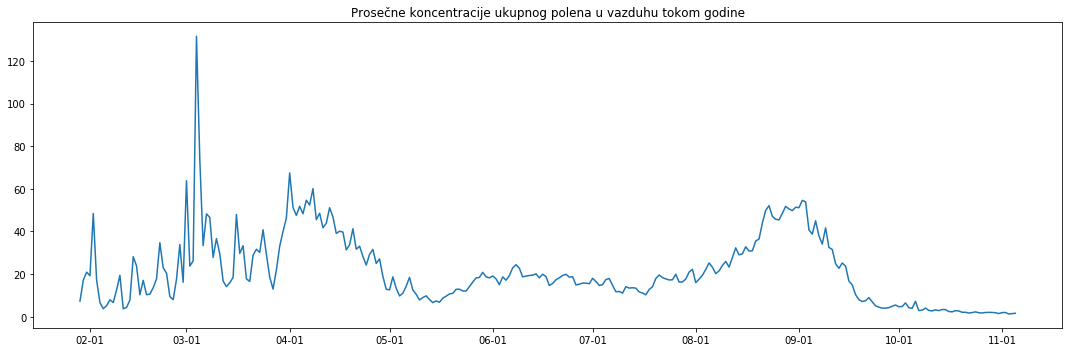

In [87]:
fig, axs = plt.subplots(1, figsize=(15,5))

axs.plot(year_mean)
plt.title('Prosečne koncentracije ukupnog polena u vazduhu tokom godine')
plt.xticks(ticks=['02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01', '09-01','10-01','11-01'])

fig.tight_layout()


In [88]:
year_mean[year_mean>80]

date_new
03-04    131.581749
Name: value, dtype: float64

Meseci sa najvišim izmerenim prosečnim koncentracijama ukupnog polena:

In [89]:
 pc_final.groupby(pd.Grouper(key='date', freq='m'))['value'].mean().sort_values(ascending=False).head(10)

date
2017-03-31    52.644350
2018-04-30    50.500801
2016-04-30    49.156704
2018-08-31    37.810410
2019-03-31    36.683934
2016-08-31    35.600963
2019-08-31    35.339104
2017-04-30    33.080439
2019-04-30    28.643489
2017-09-30    26.284021
Name: value, dtype: float64

Zbog toga što visoko alegeni poleni izazivaju najviše problema osobama kojima pate od alergijskog rinitisa i alergijske astme, pogledaćemo kada su najviše koncentracije ovih polena.

In [90]:
year_mean_high = pc_final[pc_final['allergenicity']==3].groupby('date_new')['value'].mean()

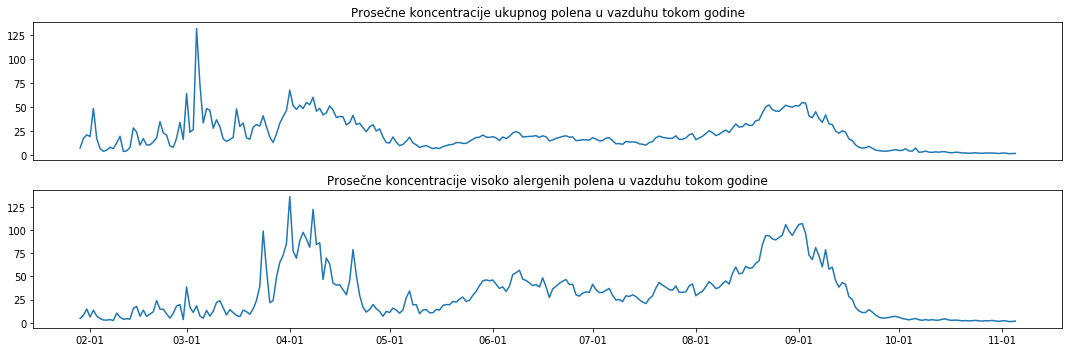

In [91]:

fig, axs = plt.subplots(2, figsize=(15,5))

axs[0].plot(year_mean)
axs[1].plot(year_mean_high)
axs[0].set_xticks(ticks=[])
axs[1].set_xticks(ticks=['02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01', '09-01','10-01','11-01'])
axs[0].set_title('Prosečne koncentracije ukupnog polena u vazduhu tokom godine')
axs[1].set_title('Prosečne koncentracije visoko alergenih polena u vazduhu tokom godine')
fig.tight_layout()

Vidimo da se pikovi koncentracija visoko alegenih polena uglavnom poklapaju sa ukupnim koncentracijama.

Meseci sa najvišim izmerenim prosečnim koncentracijama visoko alergenih polena:

In [92]:
pc_final[pc_final['allergenicity']==3].groupby(pd.Grouper(key='date', freq='m'))['value'].mean().sort_values(ascending=False).head(10)

date
2018-08-31    78.997504
2016-04-30    73.879254
2018-04-30    67.135802
2016-08-31    66.151351
2019-08-31    61.122208
2017-06-30    51.791667
2017-08-31    48.006168
2017-09-30    46.604336
2017-03-31    46.303951
2019-09-30    45.873051
Name: value, dtype: float64

In [93]:
pc_final['month'] = pc_final['date'].apply(lambda x: x.month)

In [94]:
pollen_by_month = pc_final.groupby('month')['value'].mean()

Prosečne koncentracije polena po mesecima:

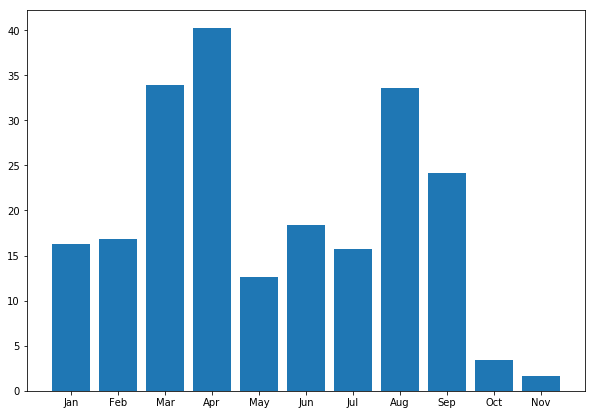

In [95]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(pollen_by_month.index, pollen_by_month)
plt.xticks(pollen_by_month.index, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'))
plt.show()

Koncentracije visoko alergenih polena po mesecima:

In [96]:
high_al_by_month = pc_final[pc_final['allergenicity']==3].groupby('month')['value'].mean()

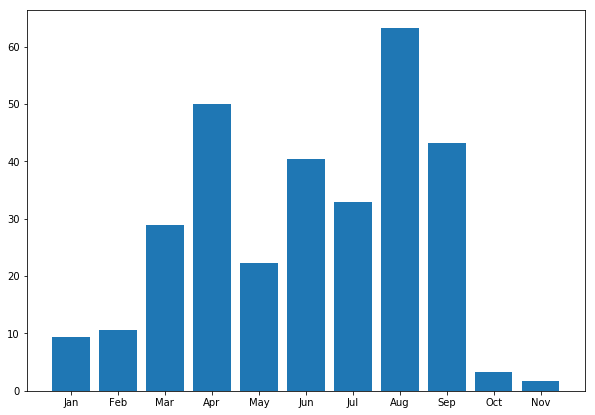

In [97]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(high_al_by_month.index, high_al_by_month)
plt.xticks(high_al_by_month.index, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'))
plt.show()

Koncentracija ukupnog polena je prosečno najviša u martu i aprilu, ali je prosečna koncentracija visoko alergenih polena najviša u avgustu.

Seledeće što nas zanima je u kojim mesecima su najviše koncentracije kojih alergena:

In [105]:
names = pc_final['localized_name'].unique().tolist()
max_polen = {}
for polen in names:
    month = pc_final[pc_final['localized_name']==polen].groupby('month')['value'].mean().sort_values(ascending=False).index[0]
    max_polen[polen] = month

In [106]:
max_polen

{'leska': 1,
 'tisa/čempr.': 3,
 'jasen': 4,
 'četinari': 5,
 'javor': 4,
 'breza': 4,
 'brest': 6,
 'jova': 1,
 'topola': 3,
 'grab': 4,
 'vrba': 4,
 'hrast': 4,
 'orah': 4,
 'bukva': 4,
 'dud': 4,
 'platan': 4,
 'lipa': 3,
 'koprivić': 4,
 'trave': 6,
 'kiselice': 3,
 'konoplje': 8,
 'bokvica': 6,
 'štirevi/pepeljuge': 8,
 'kopriva': 7,
 'ambrozija': 8,
 'pelin': 8}

Dobijeni rezultati su uglavnom u skladu sa kalendarima cvetanja. Največe odstupanje je Jova, koja po kalendarima cveta u februaru i martu, ali merenja pokazuju najveće koncentracije u septembru.

In [100]:
jova_2017 = pc_final[(pc_final['localized_name']=='jova')&(pc_final['date'].dt.year==2017)&((pc_final['month']==8)|(pc_final['month']==9))]

In [101]:
jova_2017

,date,location,mesto,allergen,value,latitude,longitude,allergenicity,allergenicity_display,localized_name,type,id,name,level,date_new,month
71556,2017-08-28,4,kragujevac,2,117,44.03333,20.93333,3,high,jova,1,1,drveće,high,08-28,8
71557,2017-08-29,4,kragujevac,2,71,44.03333,20.93333,3,high,jova,1,1,drveće,moderate,08-29,8
71558,2017-08-30,4,kragujevac,2,43,44.03333,20.93333,3,high,jova,1,1,drveće,moderate,08-30,8
71559,2017-08-31,4,kragujevac,2,82,44.03333,20.93333,3,high,jova,1,1,drveće,moderate,08-31,8
71560,2017-09-01,4,kragujevac,2,112,44.03333,20.93333,3,high,jova,1,1,drveće,high,09-01,9
71561,2017-09-02,4,kragujevac,2,256,44.03333,20.93333,3,high,jova,1,1,drveće,high,09-02,9
71562,2017-09-03,4,kragujevac,2,131,44.03333,20.93333,3,high,jova,1,1,drveće,high,09-03,9
71563,2017-09-04,4,kragujevac,2,276,44.03333,20.93333,3,high,jova,1,1,drveće,high,09-04,9
71564,2017-09-05,4,kragujevac,2,212,44.03333,20.93333,3,high,jova,1,1,drveće,high,09-05,9
71565,2017-09-06,4,kragujevac,2,1043,44.03333,20.93333,3,high,jova,1,1,drveće,high,09-06,9


Vidimo da je koncentracija polena jove u avgustu i septembru neobičajeno visoka za samo jedno merno mesto (Kragujevac) u jednoj godini (2017). 

In [102]:
pc_final = pc_final.drop(jova_2017.index)

In [107]:
max_polen

{'leska': 1,
 'tisa/čempr.': 3,
 'jasen': 4,
 'četinari': 5,
 'javor': 4,
 'breza': 4,
 'brest': 6,
 'jova': 1,
 'topola': 3,
 'grab': 4,
 'vrba': 4,
 'hrast': 4,
 'orah': 4,
 'bukva': 4,
 'dud': 4,
 'platan': 4,
 'lipa': 3,
 'koprivić': 4,
 'trave': 6,
 'kiselice': 3,
 'konoplje': 8,
 'bokvica': 6,
 'štirevi/pepeljuge': 8,
 'kopriva': 7,
 'ambrozija': 8,
 'pelin': 8}

Nakon uklanjanja ovih vrednosti, najveće koncentracije polena jove su u januaru.

In [108]:
pc_final.head()

,date,location,mesto,allergen,value,latitude,longitude,allergenicity,allergenicity_display,localized_name,type,id,name,level,date_new,month
0,2016-02-01,12,kraljevo,9,5,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-01,2
1,2016-02-02,12,kraljevo,9,5,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-02,2
2,2016-02-03,12,kraljevo,9,9,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-03,2
3,2016-02-04,12,kraljevo,9,1,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-04,2
4,2016-02-05,12,kraljevo,9,1,43.72583,20.68944,2,moderate,leska,1,1,drveće,low,02-05,2


In [112]:
dates = pc_final['date_new'].unique()

In [120]:
ambrozija = pc_final[pc_final['localized_name']=='ambrozija'].groupby('date_new')['value'].mean()
trave = pc_final[pc_final['localized_name']=='trave'].groupby('date_new')['value'].mean()
jova = pc_final[pc_final['localized_name']=='jova'].groupby('date_new')['value'].mean()
breza = pc_final[pc_final['localized_name']=='breza'].groupby('date_new')['value'].mean()


In [124]:
ambrozija = ambrozija.reindex(dates).fillna(0).sort_index(ascending=True)

In [125]:
trave = trave.reindex(dates).fillna(0).sort_index(ascending=True)
jova = jova.reindex(dates).fillna(0).sort_index(ascending=True)
breza = breza.reindex(dates).fillna(0).sort_index(ascending=True)

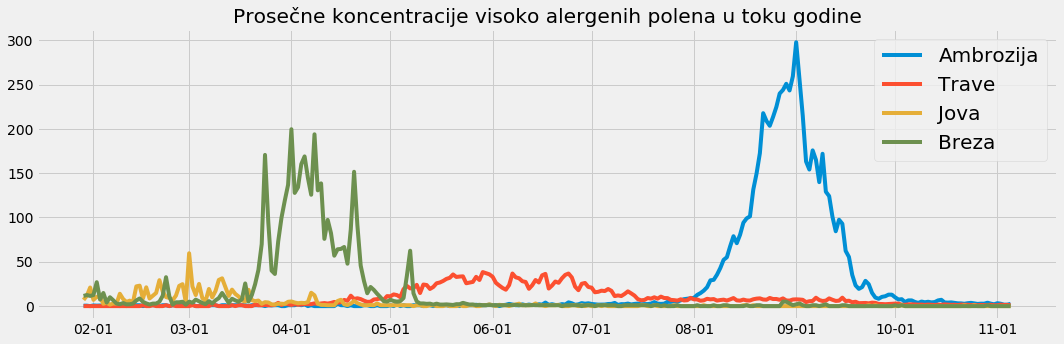

In [126]:
fig, axs = plt.subplots(1, figsize=(15,5))

p1 = plt.plot(ambrozija)
p2 = plt.plot(trave)
p3 = plt.plot(jova)
p4 = plt.plot(breza)

plt.title('Prosečne koncentracije visoko alergenih polena u toku godine')
plt.legend((p1[0], p2[0], p3[0], p4[0]),('Ambrozija', 'Trave', 'Jova', 'Breza'), prop={'size': 20})
plt.style.use('fivethirtyeight')
plt.xticks(ticks=['02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01', '09-01','10-01','11-01'])


fig.tight_layout()

# Koncentracije polena prema mernim mestima

In [127]:
polen_mesta = pc_final.groupby('mesto')['value'].mean().sort_values(ascending=True)

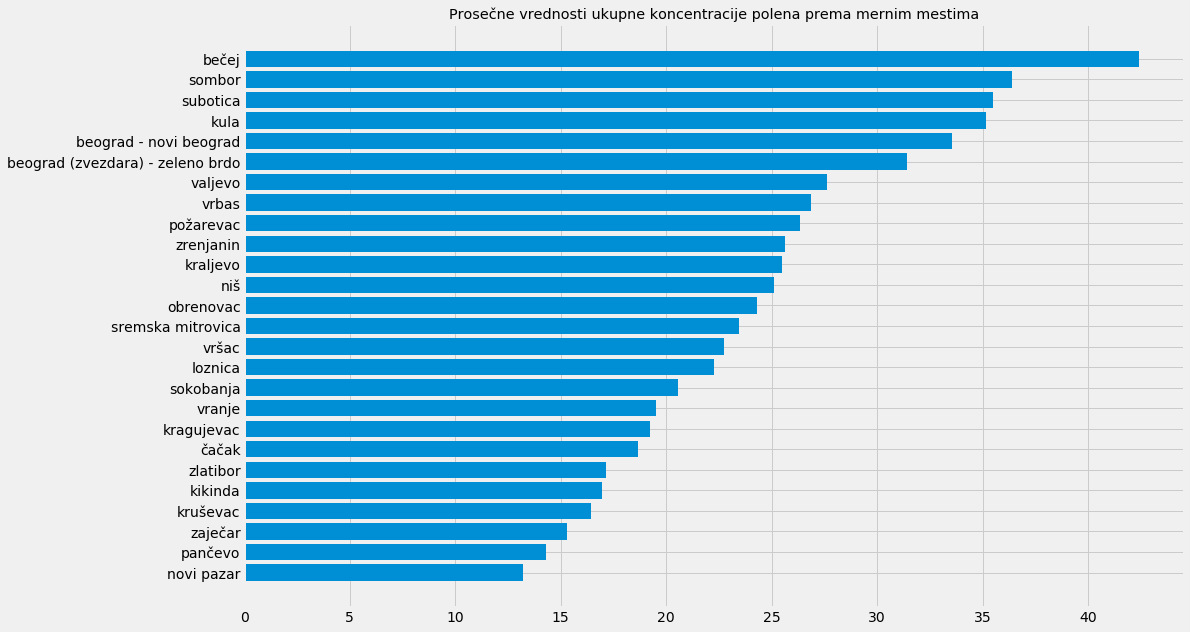

In [128]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(polen_mesta.index, polen_mesta)
plt.xticks()
plt.style.use('ggplot')
plt.title('Prosečne vrednosti ukupne koncentracije polena prema mernim mestima')
plt.show()

In [129]:
polen_va_mesta = pc_final[pc_final['allergenicity']==3].groupby('mesto')['value'].mean().sort_values(ascending=True)

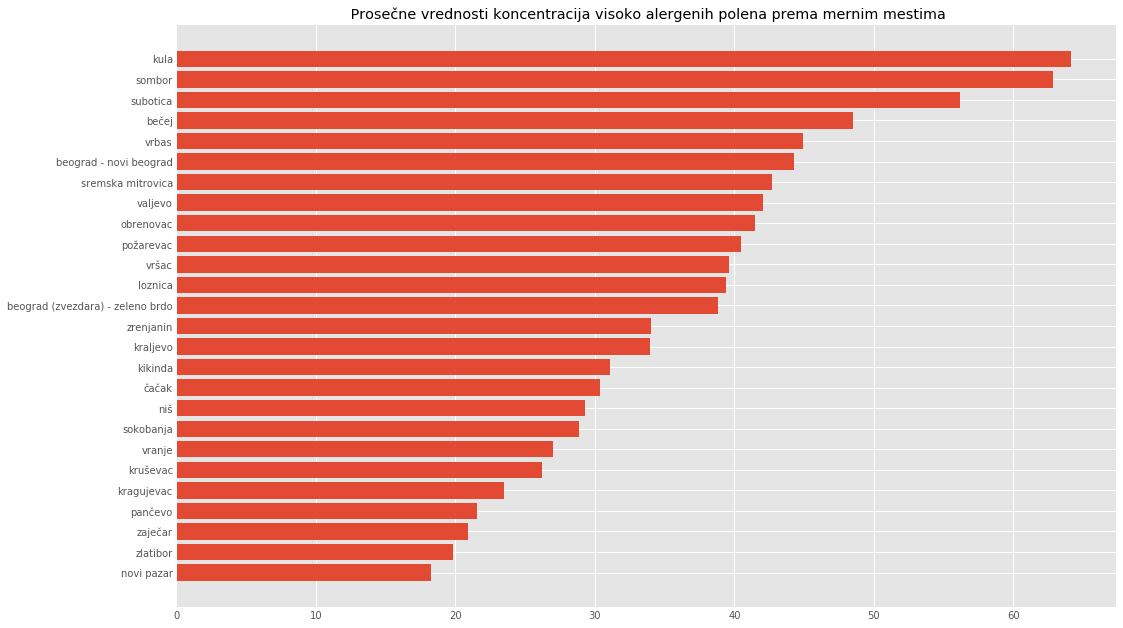

In [130]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(polen_va_mesta.index, polen_va_mesta)
plt.xticks()
plt.style.use('ggplot')
plt.title(' Prosečne vrednosti koncentracija visoko alergenih polena prema mernim mestima')
plt.show()